<ipython-input-4-6795a17b3cd3>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


   open_t-1  high_t-1  low_t-1  close_t-1  no_of_shares_t-1  no_of_trades_t-1  \
1    104.05    104.30    101.0     101.25         4336484.0           46805.0   
2    103.30    104.35    101.0     101.35         1093913.0           17929.0   
3    106.45    107.00    103.6     105.05         3974953.0           33619.0   
4    106.85    107.00    103.6     105.05          798161.0           12835.0   
5    107.00    109.70    105.4     105.90         6009879.0           45387.0   

   tata_powers_t-1  open_t+1  high_t+1  low_t+1  close_t+1  no_of_shares_t+1  \
1           237.55    103.30    104.35   101.00     101.35         1093913.0   
2           239.80    106.45    107.00   103.60     105.05         3974953.0   
3           240.00    106.85    107.00   103.60     105.05          798161.0   
4           224.50    107.00    109.70   105.40     105.90         6009879.0   
5           239.90    106.85    109.75   105.55     105.95          699090.0   

   no_of_trades_t+1  tata_powers

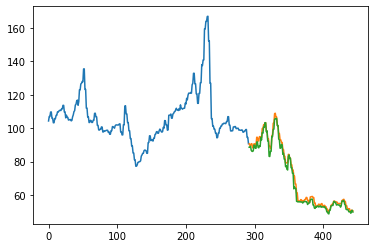

In [4]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
import math
import pandas as pd

def parser(x):
	return pd.to_datetime(x)

stock_series = read_csv('stockData.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

# Create the lagged dataset for prediction
stock_values = DataFrame(stock_series.values)
stock_dataframe = concat([stock_values.shift(1), stock_values], axis=1)
stock_dataframe.columns = ['open_t-1','high_t-1', 'low_t-1', 'close_t-1', 'no_of_shares_t-1', 'no_of_trades_t-1', 'tata_powers_t-1' ,'open_t+1','high_t+1', 'low_t+1', 'close_t+1', 'no_of_shares_t+1', 'no_of_trades_t+1', 'tata_powers_t+1' ]
stock_dataframe = stock_dataframe.dropna()
print(stock_dataframe.head(5))


# split stock price into train and test sets
split_X = stock_dataframe.values
stock_train_size = int(len(split_X) * 0.66)
stock_train, stock_test = split_X[1:stock_train_size], split_X[stock_train_size:]
stock_train_X, stock_train_y = stock_train[:,0], stock_train[:,1]
stock_test_X, stock_test_y = stock_test[:,0], stock_test[:,1]
 
# persistence model
def baseline_persistence(x):
	return x
 
# walk-forward validation
stock_predictions = list()
for x in stock_test_X:
	yhat = baseline_persistence(x)
	stock_predictions.append(yhat)
stock_mse = mean_squared_error(stock_test_y, stock_predictions)
stock_mae = mean_absolute_error(stock_test_y, stock_predictions)
stock_mape = mean_absolute_percentage_error(stock_test_y, stock_predictions)
stock_rmse = math.sqrt(stock_mse)

print('Test MSE: %.3f' % stock_mse ) 
print(' MAE: %.3f' % stock_mae ) 
print(' RMSE: %.3f' % stock_rmse) 
print('MAPE: %.3f' % stock_mape) 

# plot stock price predictions and expected results
plt.plot(stock_train_y)
plt.plot([None for i in stock_train_y] + [x for x in stock_test_y])
plt.plot([None for i in stock_train_y] + [x for x in stock_predictions])
plt.show()